## 导入包

In [20]:
import numpy as np

## 定义模型结构

In [109]:
def relu(x):
    return np.maximum(0, x)
class Model():
    def __init__(self, input_size=1, hidden_size=512, output_size=1) -> None:
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
    def forward(self, x):
        self.input = x
        self.h1 = np.dot(x, self.W1)+self.b1
        self.r1 = relu(self.h1)
        self.o1 = np.dot(self.r1, self.W2)+self.b2
        return self.o1
    def backward(self, grad_y, lr=1e-5):
        # layer 2
        grad_W2 = np.dot(self.r1.T, grad_y)
        grad_b2 = np.sum(grad_y, axis=0)
        grad_h1 = np.dot(grad_y, self.W2.T) # for relu
        # relu
        grad_h1[self.h1<=0] = 0
        # layer 1
        grad_W1 = np.dot(self.input.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0)
        # gradient descent
        self.W1 -= lr * grad_W1
        self.b1 -= lr * grad_b1
        self.W2 -= lr * grad_W2
        self.b2 -= lr * grad_b2

model = Model()

## 定义训练过程

In [65]:
def train_one_step(model: Model, x, y, lr=1e-5):
    y_pred = model.forward(x)
    loss = np.mean(.5*(y-y_pred)**2)
    grad_y = y_pred-y
    model.backward(grad_y, lr)
    return loss
def test(model: Model, x, y):
    y_pred = model.forward(x)
    loss = np.mean(.5*(y-y_pred)**2)
    return y_pred, loss

## 构造数据集并划分测试集和训练集

In [110]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
# y = np.sin(x)
y = x**2

# shuffle the index
indices = np.random.permutation(x.shape[0])
x = x[indices]
y = y[indices]

# split
split_ratio = 0.8
split_idx = int(len(x) * split_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## 训练

In [112]:
# HyperParam
lr = 1e-6
epochs = 100000
for epoch in range(epochs):
    loss = train_one_step(model, x_train, y_train, lr)
    if epoch % (epochs/10) == 0:
        print('epoch ', epoch, 'loss: ', loss)

y_pred, test_loss = test(model, x_test, y_test)

epoch  0 loss:  0.13658775815942878
epoch  10000 loss:  0.031076630768441624
epoch  20000 loss:  0.014981461503704472
epoch  30000 loss:  0.009090354975409385
epoch  40000 loss:  0.006142491392059031
epoch  50000 loss:  0.004470755484705085
epoch  60000 loss:  0.0034256928883430447
epoch  70000 loss:  0.0027301487033892773
epoch  80000 loss:  0.0022455769646448796
epoch  90000 loss:  0.0018912575348254985


## 可视化训练结果

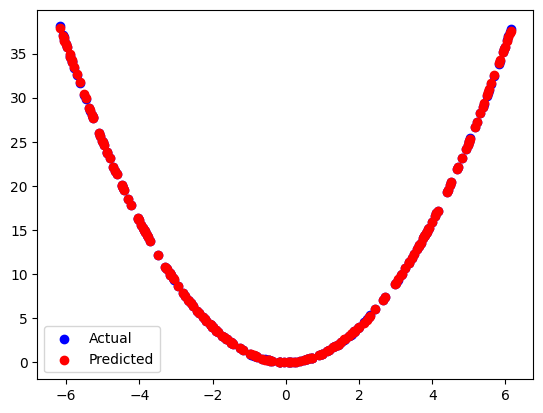

In [113]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, c='b', label='Actual')
plt.scatter(x_test, y_pred, c='r', label='Predicted')
plt.legend()
plt.show()